### **World Cup DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data mining/ground_stats_odi - Sheet1-2.csv')


df.head()

,Team_1,Team_2,Winner,Margin,Ground,Match_Date,Scorecard
0,India,Australia,Australia,7 wickets,Ahmedabad,"Oct 5, 1984",ODI # 270
1,India,Australia,India,52 runs,Ahmedabad,"Oct 5, 1986",ODI # 394
2,India,Zimbabwe,India,7 wickets,Ahmedabad,"Oct 26, 1987",ODI # 469
3,India,West Indies,West Indies,2 runs,Ahmedabad,"Jan 7, 1988",ODI # 489
4,India,Sri Lanka,India,6 runs,Ahmedabad,"Oct 22, 1989",ODI # 580


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team_1      215 non-null    object
 1   Team_2      215 non-null    object
 2   Winner      215 non-null    object
 3   Margin      215 non-null    object
 4   Ground      215 non-null    object
 5   Match_Date  215 non-null    object
 6   Scorecard   215 non-null    object
dtypes: object(7)
memory usage: 11.9+ KB


so there is no null value in the dataset

In [ ]:
df.nunique()

Team_1         15
Team_2         15
Winner         19
Margin         89
Ground         10
Match_Date    206
Scorecard     215
dtype: int64

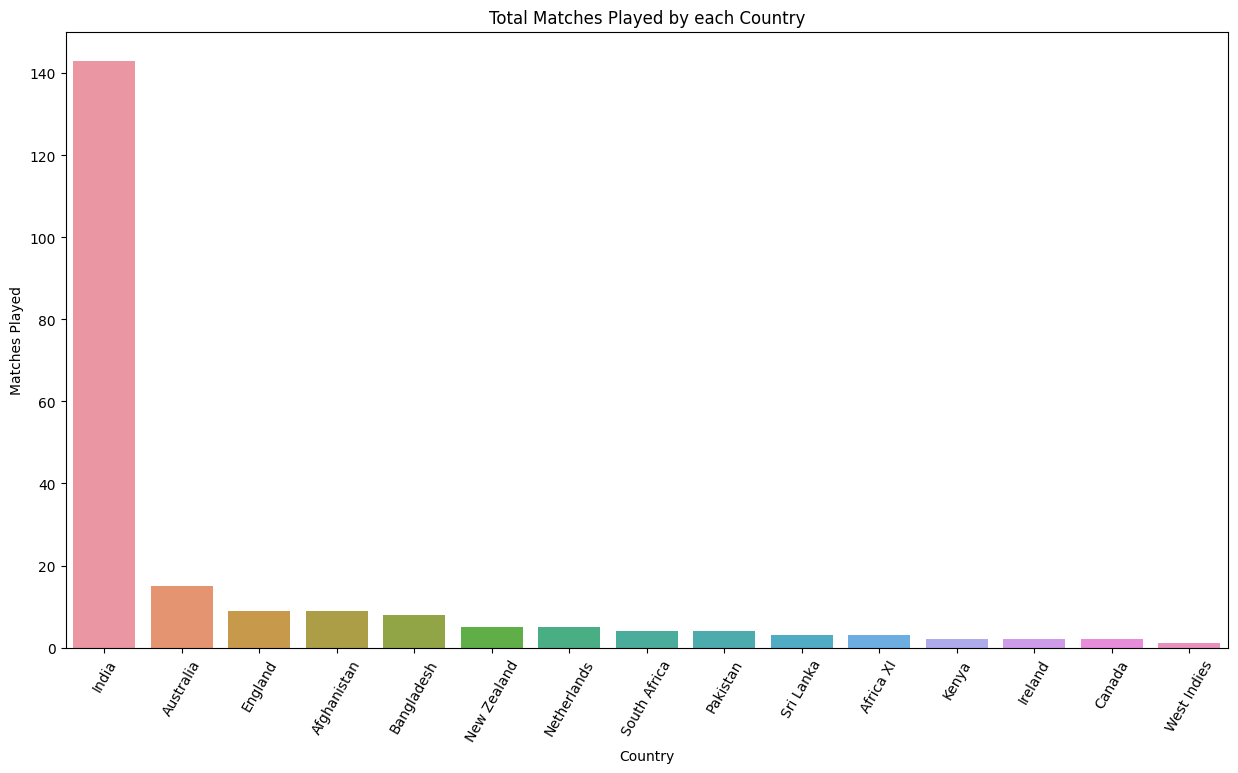

In [ ]:
team_matches = df['Team_1'].value_counts().reset_index()

# Renaming the columns for clarity
team_matches.columns = ['Country', 'Matches Played']

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Matches Played', data=team_matches)
plt.title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [ ]:
result_counts = df.groupby(['Team_1', 'Winner'])['Ground'].count().reset_index()
result_counts.rename(columns={'Ground': 'Count'}, inplace=True)

# Create the 'Result' column based on the 'Team_2' and 'Winner' columns
result_counts['Result'] = result_counts.apply(
    lambda row: 'Win' if row['Team_1'] == row['Winner'] else 'Loss',
    axis=1
)

# Remove unnecessary columns
result_counts.drop(['Team_1', 'Winner'], axis=1, inplace=True)

# Create the 'Country' column based on the 'Team_2' column
result_counts['Country'] = df['Team_1']

# Rearrange the columns
result_counts = result_counts[['Country', 'Result', 'Count']]

# Display the calculated DataFrame
print(result_counts)

         Country Result  Count
0          India    Win      4
1          India   Loss      1
2          India   Loss      1
3          India   Loss      3
4          India   Loss      3
5          India    Win     14
6        England   Loss      1
7      Australia   Loss      1
8          India   Loss      1
9          India   Loss      1
10         India   Loss      1
11         India   Loss      1
12   West Indies   Loss      1
13     Sri Lanka   Loss      1
14  South Africa   Loss      1
15         India    Win      1
16       England   Loss      1
17         India    Win      4
18     Australia   Loss      1
19   New Zealand   Loss      2
20         India   Loss      1
21         India   Loss      1
22         India   Loss     14
23         India   Loss      8
24         India    Win     86
25         India   Loss      2
26       England   Loss      9
27         India   Loss      5
28     Australia   Loss      5
29         India   Loss      9
30     Australia   Loss      4
31     A

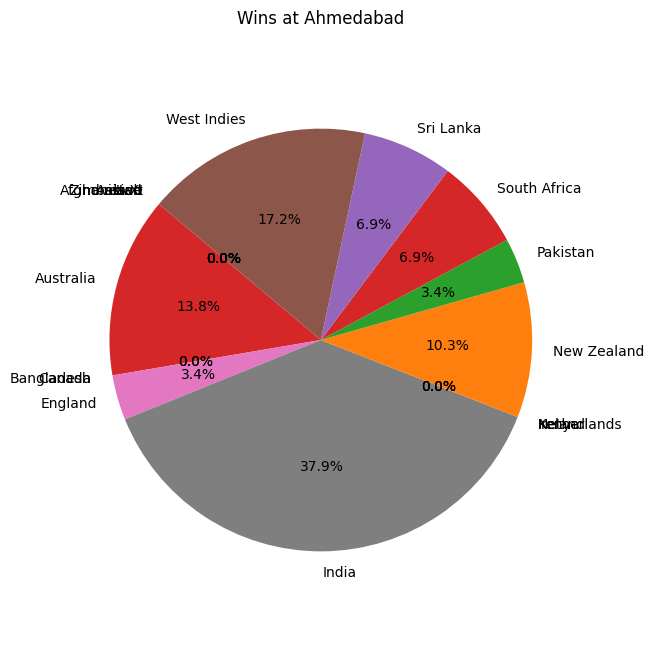

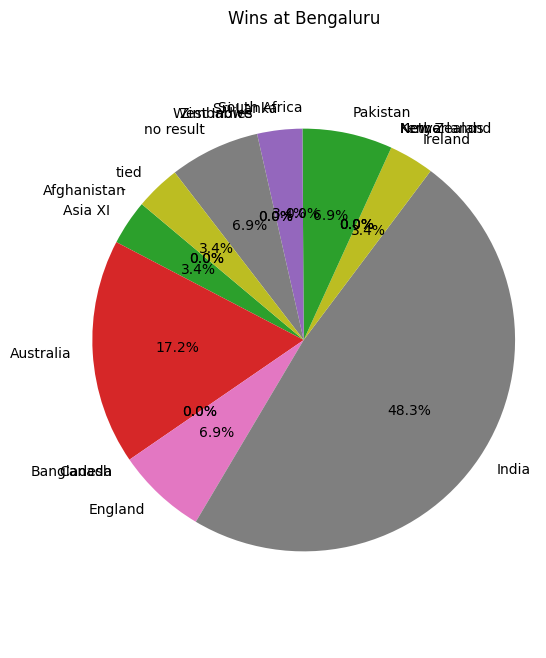

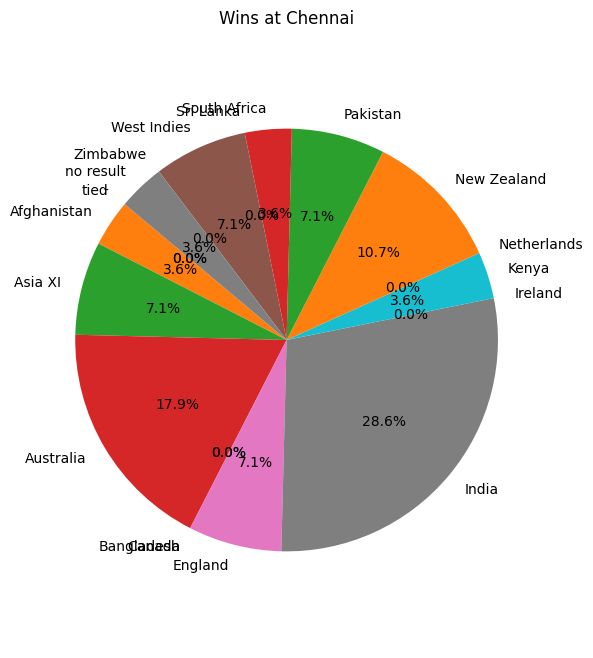

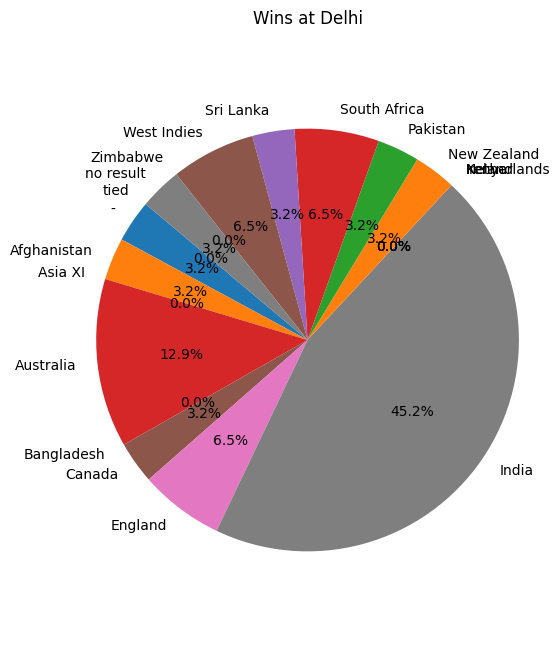

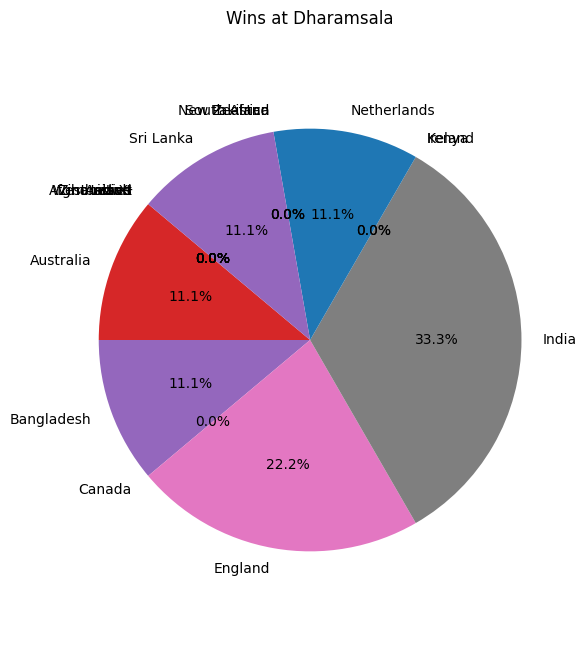

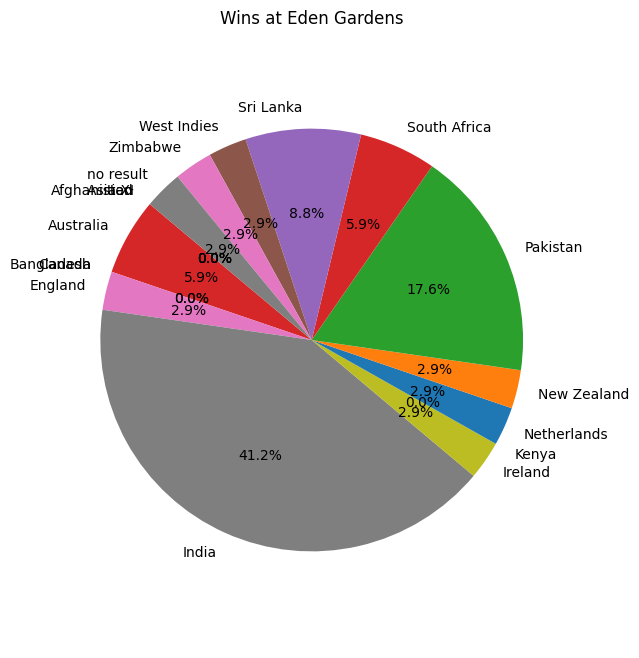

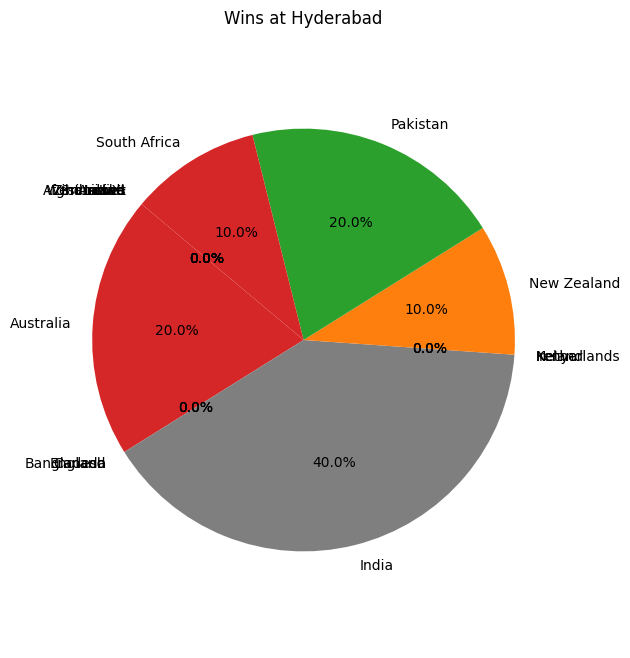

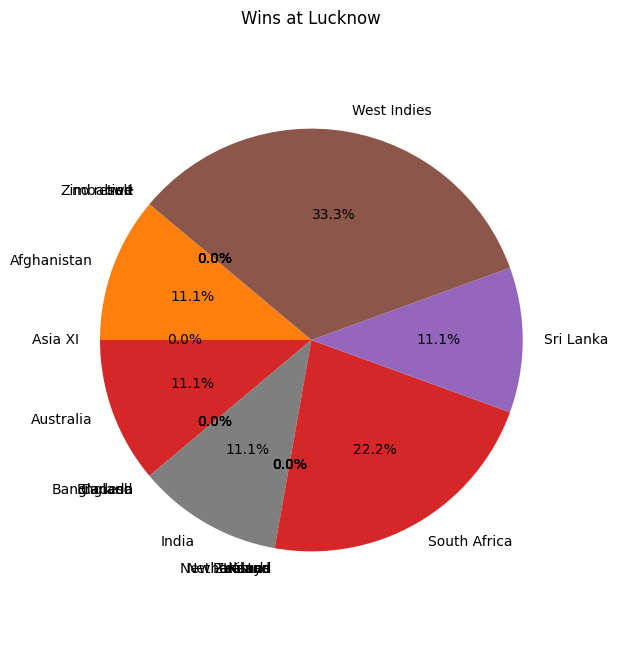

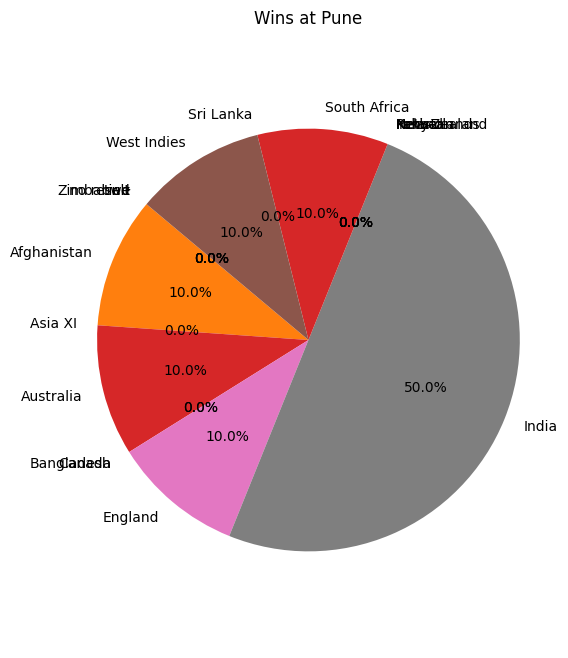

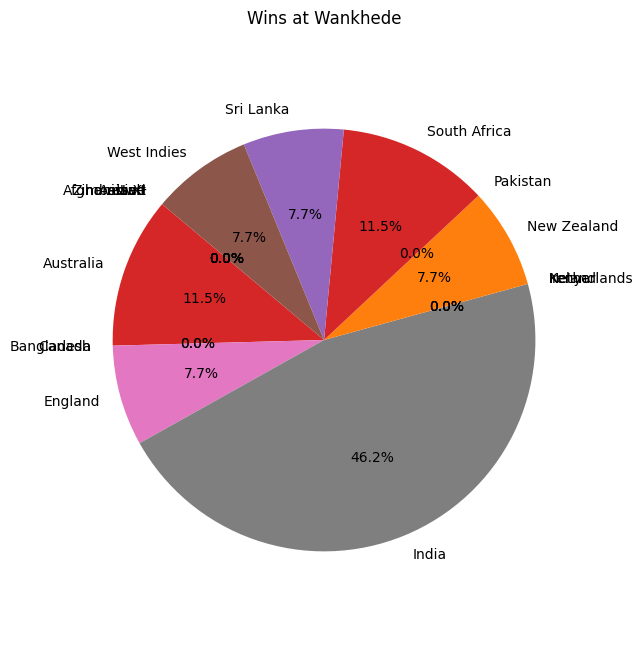

In [ ]:
win_counts = df.groupby(['Ground', 'Winner']).size().unstack(fill_value=0)

# Loop through each ground and create a pie chart
for ground in win_counts.index:
    ground_data = win_counts.loc[ground]
    labels = ground_data.index
    sizes = ground_data.values
     # You can customize the colors

    plt.figure(figsize=(6, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=140)
    plt.title(f'Wins at {ground}')

    # Adjust the aspect ratio to ensure the pie chart is circular
    plt.axis('equal')

    # Show the pie chart
    plt.show()

As you can see the highest win in most of the stadium is team India,


---


The first semi-final is in Wankhede and India won the 46.2% and followed by Australia nad South Africa with same winning percentage of 11.5% in that venue


---
The second semi-final is in Eden garden and India won the 41.2% and followed by pakistan with 17.6% in that venue


---
The final is in Ahmedabad India won 37.9% and followed by the west Indies which is not in game but then Australia with winning percentage of 13.8% in that venue

So according ground probability the top four teams are


*   India
*   Australia
*   South Africa
*   Pakistan



